<p><font size="6"><b>Matplotlib introduction </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2016*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---


In [1]:
%matplotlib inline

# An introduction to matplotlib

Matplotlib is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits.

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider maptlotlib community, should always be imported as ``plt``:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## The matplotlib figure

At the heart of **every** plot is the figure object. The "Figure" object is the top level concept which can be drawn to one of the many output formats, or simply just to screen. Any object which can be drawn in this way is known as an "Artist" in matplotlib.

Lets create our first artist using pyplot, and then show it:

In [3]:
fig = plt.figure()
plt.show()

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the "Axes" artist. The Axes artist represents the "data space" of a typical plot, a rectangular axes (the most common, but not always the case, e.g. polar plots) will have 2 (confusingly named) Axis artists with tick labels and tick marks.

There is no limit on the number of Axes artists which can exist on a Figure artist. Let's go ahead and create a figure with a single Axes artist, and show it using pyplot:

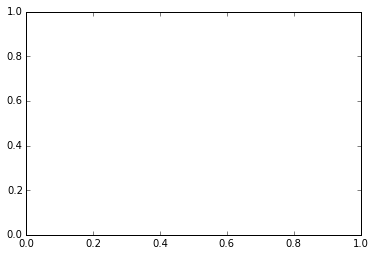

In [4]:
ax = plt.axes()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist, its just we didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot called **``gcf``** and **``gca``**.

### pyplot versus Object oriented

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

Observe the following difference:

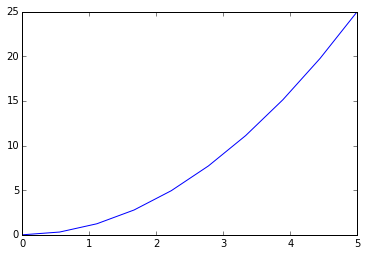

In [6]:
plt.figure()
plt.plot(x, y, '-')

 First, we are not using the returned artists, so we could avoid the assignment and just call the appropriate functions. Second, in exactly the same way that we didn't *need* to manually create a Figure artist when using the ``pyplot.axes`` method, we can remove the ``plt.axes`` if we use the ``plot`` function from ``pyplot``. Our simple line example then becomes:

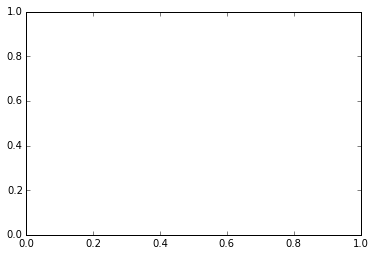

In [7]:
fig, ax1 = plt.subplots()
ax.plot(x, y, '-')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

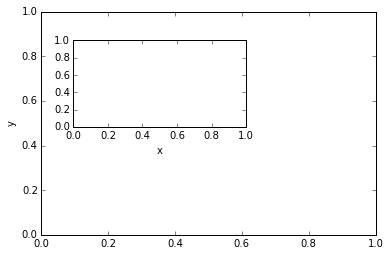

In [8]:
fig, ax1 = plt.subplots()
ax.plot(x, y, '-')
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
ax1.set_ylabel('y')
ax2.set_xlabel('x')

The simplicity of this example shows how visualisations can be produced quickly and easily with matplotlib, but it is worth remembering that for full control of Figure and Axes artists we can mix the convenience of ``pyplot`` with the power of matplotlib's object oriented design!

## Working with the axes

As has already been mentioned, most of your time building a visualisation in matplotlib will be spent on the Axes artist. Whilst the documentation for the Axes artist is very detailed, it is also rather difficult to navigate (this is an ongoing area of improvement).
As a result, it is often easier to find new plot types by looking at the pyplot module's documentation.

The first and most common Axes method is ``plot``. Go ahead and look at the ``plot`` documentation from the following sources:

 * http://matplotlib.org/api/pyplot_summary.html
 * http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
 * http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.plot
 
Plot can be used to draw one or more lines in axes data space:

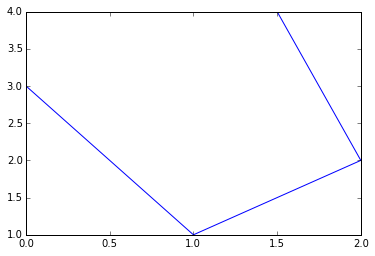

In [10]:
fig, ax = plt.subplots()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])

Notice how the axes' view limits (``ax.viewLim``) have been updated to include the whole of the line.
Should we want to add some spacing around the edges of our axes we could set the axes' margin using the Axes artist's [``margins``](http://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes.margins) method. Alternatively, we could manually set the limits with the Axes artist's [``set_xlim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_xlim) and [``set_ylim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_ylim) methods.

------

**Exercise:** Modify the previous example to produce 3 different figures which control the limits of the axes by:

1\. Manually setting the x and y limits to $[0.5, 2]$ and $[1, 5]$ respectively.

(1.0, 5.0)

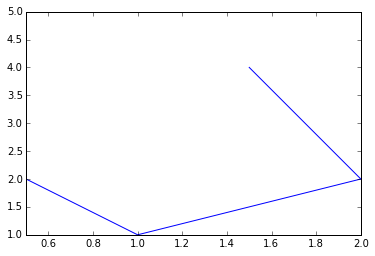

In [12]:
fig, ax = plt.subplots()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
ax.set_xlim([0.5, 2.])
ax.set_ylim([1., 5.])

2\. Provide a title to the ax

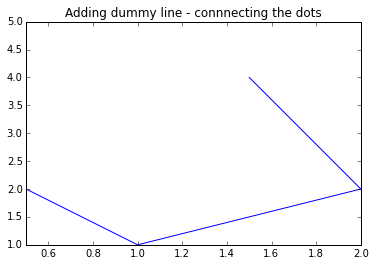

In [13]:
fig, ax = plt.subplots()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
ax.set_xlim([0.5, 2.])
ax.set_ylim([1., 5.])
ax.set_title(r'Adding dummy line - connnecting the dots')

3\. Setting only xticks on the values 0, 1 and 2:

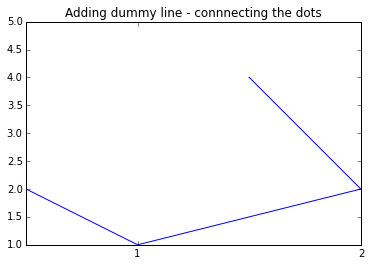

In [16]:
fig, ax = plt.subplots()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
ax.set_ylim([1., 5.])
ax.set_xticks([0., 1., 2.])
ax.set_xlim([0.5, 2.]) #watch the order!
ax.set_title(r'Adding dummy line - connnecting the dots')

**Exercise**: By calling ``plot`` multiple times, create a single axes showing the line plots of $y=sin(x)$ and $y=cos(x)$ in the interval $[0, 2\pi]$ with 200 linearly spaced $x$ samples.

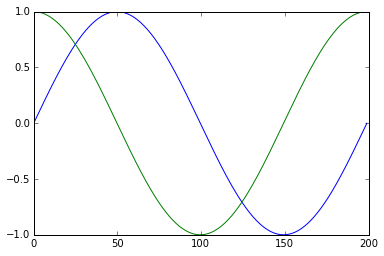

In [17]:
x = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots()
ax.plot(np.sin(x))
ax.plot(np.cos(x))

----------------------

## Multiple axes on the same figure (aka subplot)

Matplotlib makes it relatively easy to add more than one Axes artist to a figure. The ``add_subplot`` method on a Figure artist, which is wrapped by the ``subplot`` function in ``pyplot``, adds an Axes artist in the grid position specified. To compute the position, we must tell matplotlib the number of rows and columns to separate the figure into, and which number the axes to be created is (1 based). For example, to create axes at the top right and bottom left of a $3 x 2$ notional grid of Axes artists the grid specifications would be ``2, 3, 3`` and ``2, 3, 4`` respectively:

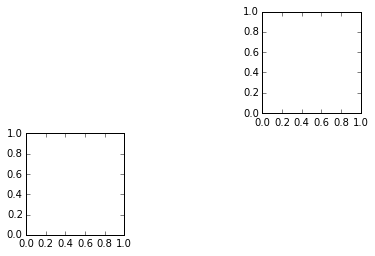

In [20]:
top_right_ax = plt.subplot(2, 3, 3)
bottom_left_ax = plt.subplot(2, 3, 4)

plt.show()

--------

**Exercise 3 continued:** Copy the answer from the previous task (plotting $y=sin(x)$ and $y=cos(x)$) and add the appropriate ``plt.subplot`` calls to create a figure with 2 rows of Axes artists, one showing $y=sin(x)$ and the other showing $y=cos(x)$. Do this with using plt.subplots()

--------

## Further plot types

Matplotlib comes with a huge variety of different plot types, here is a quick demonstration of the more common ones.

In [21]:
import numpy as np

In [22]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

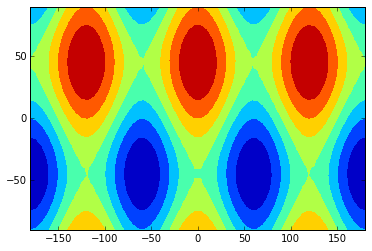

In [23]:
plt.contourf(x, y, data)
plt.show()

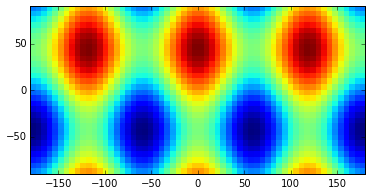

In [24]:
plt.imshow(data, extent=[-180, 180, -90, 90], interpolation='nearest', origin='lower')
plt.show()

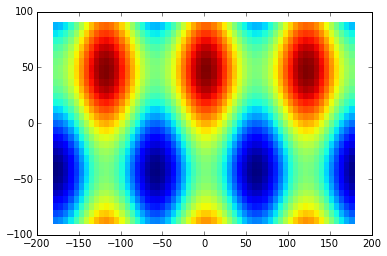

In [25]:
plt.pcolormesh(x, y, data)
plt.show()

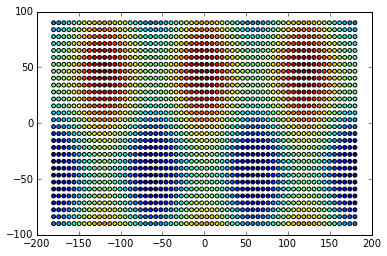

In [26]:
plt.scatter(x2d, y2d, c=data, s=15)
plt.show()

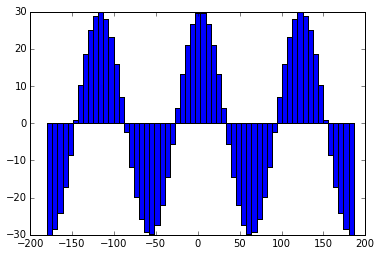

In [27]:
plt.bar(x, data.sum(axis=0), width=np.diff(x)[0])
plt.show()

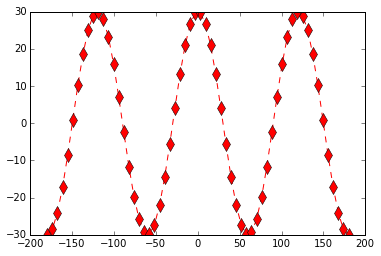

In [28]:
plt.plot(x, data.sum(axis=0), linestyle='--', marker='d', markersize=10, color='red')
plt.show()

## Titles, Legends, colorbars and annotations

Matplotlib has convenience functions for the addition of things such as titles, legends, colorbars and text based annotation.

The ``suptitle`` pyplot function allows us to set the title of a figure, and the ``set_title`` method on an Axes artist allows us to set the title of individual axes. Additionally Axes artists have methods named ``set_xlabel`` and ``set_ylabel`` to label the respective x and y Axis artists (that's Axis, not Axes). Finally, we can add text, located by data coordinates, with the ``text`` method on an Axes artist:

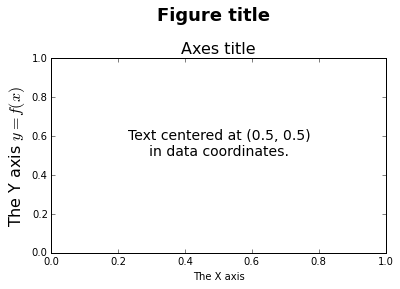

In [31]:
fig, ax  = plt.subplots()
# Adjust the created axes so that its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)

fig.suptitle('Figure title', fontsize=18, fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

plt.show()

The creation of a legend is as simple as adding a "label" to lines of interest, this can be done directly in the call to ``plt.plot``, and then followed up by a call to ``plt.legend``:

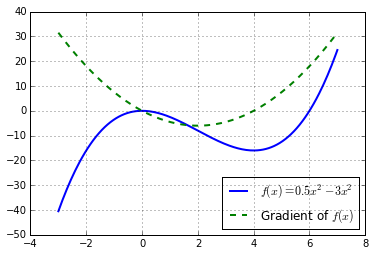

In [32]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2, label='$f(x)=0.5x^2-3x^2$')
plt.plot(x, 1.5*x**2 - 6*x, linewidth=2, linestyle='--', label='Gradient of $f(x)$', )
plt.legend(loc='lower right')
plt.grid()
plt.show()

Colorbars are created with the ``plt.colorbar`` function:

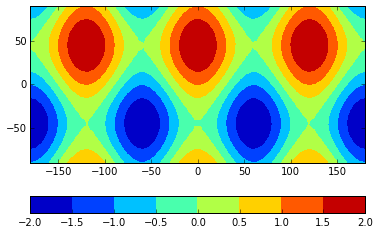

In [33]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

plt.contourf(x, y, data)
plt.colorbar(orientation='horizontal')
plt.show()

Matplotlib comes with powerful annotation capabilities which are described in detail at http://matplotlib.org/users/annotations_intro.html.

The annotation's power can mean that the syntax is a little harder to read, for example one of the simplest examples using annotate:

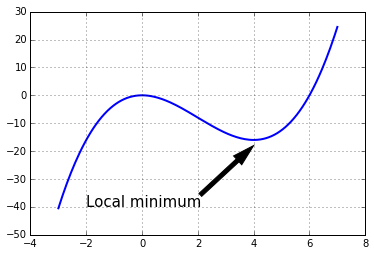

In [34]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2)
plt.annotate('Local minimum',
             xy=(4, -18),
             xytext=(-2, -40), fontsize=15,
             arrowprops={'facecolor': 'black', 'frac': 0.3})
plt.grid()
plt.show()

## Savefig & backends

Matplotlib allows you to specify a "backend" to drive the figure rendering. The backend includes the graphical user interface (GUI) library to use, and the most used backend (as it is normally the default one) is the "TkAgg" backend. This backend, when ``plt.show()`` is called, pops up a figure in a new TkInter window which is rendered by the anti-grain graphics library (also known as "agg"). Generally, the most common reason to want to change backends is for automated figure production on a headless server. In this situation, the "agg" backend can be used:

    import matplotlib
    matplotlib.use('agg')
    import matplotlib.pyplot as plt
    
Note: The backend must be chosen before importing pyplot for the first time, unless the ``force`` keyword is added.

None interactive backends such as the "agg" backend will do nothing when **``plt.show()``** is called - this is because there is nowhere for a figure to be displayed.

To save a figure programmatically the ``savefig`` function can be used from any backend:

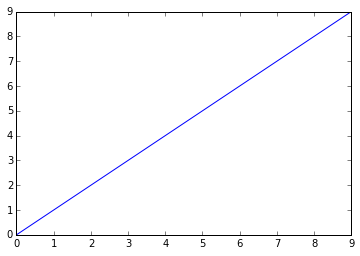

In [35]:
plt.plot(range(10))
plt.savefig('simple.svg')

For graphical backends, showing and subsequently closing the window of a figure results in the figure being cleared from the matplotlib system. This is not the case for ``plt.savefig``, which typically should be called before ``plt.show``. It is also possible to manually close figures with the ``plt.close`` function after calling something such as ``plt.savefig`` to remove the current figure.

## STYLE SHEETS

MAtplotlib is default very matlab-lookalike and sometimes not really catchy. The power of the object-oriented way of working makes it possible to change everything. However, mostly we just want quickly a good-looking plot. Matplotlib provides a number of styles that can be used to quickly change a number of settings:

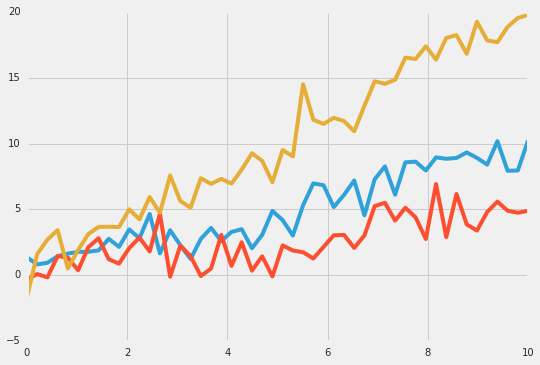

In [60]:
x = np.linspace(0, 10)
with plt.style.context('fivethirtyeight'):  # 'ggplot', 'bmh', 'grayscale'
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 2 * x + np.random.randn(50))

However, a nice alternative is just importing seaborn:

In [64]:
import seaborn as sns
sns.set_style('darkgrid')

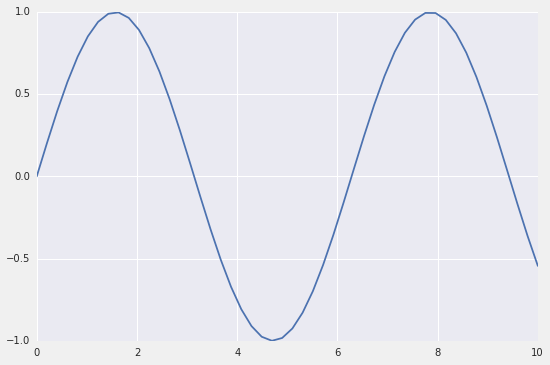

In [65]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

Seaborn provides a set of different style options too:

In [66]:
sns.set_style('whitegrid')

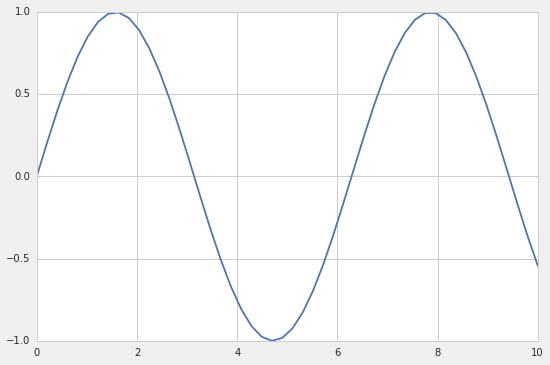

In [67]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

### FOR INSPIRATION: http://matplotlib.org/gallery.html

---
# Acknowledgement


> This notebook is based on material of the Met Office (Copyright (C) 2013 SciTools, GPL licensed): https://github.com/SciTools/courses
